In [3]:
# -*- coding: utf-8 -*-
__author__ = 'adindar'
# Dünya barışı için :)
# 2015_1107- ilk kod yazım zamanı

In [4]:
from datetime import datetime
# print datetime.now().strftime('%Y-%m-%d %H:%M:%S')+'\n'
print datetime.now().strftime('%Y-%m-%d %H:%M:%S') + '|' + 'Ahmet Anıl Dindar Çalışmaktadır |'

2016-08-22 17:10:08|Ahmet Anıl Dindar Çalışmaktadır |


---
#### Buraya şimdi KYH'nin sayfasını okutalım ve en son depremin verilerini işletelim.

In [5]:
kyh_url = 'http://kyhdata.deprem.gov.tr/2K/kyhdata_v4.php' # KYH'nin güncel adresi

---
#### **A** - Güncel KYH'den son depremin okunması

### KYH'nin okuması yapılır

In [6]:
# ============== download edelim # ==============
print'\n'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "| KYH'nin sayfası okunacak"
import urllib2
kyh_homepage_content = urllib2.urlopen( kyh_url )
kyh_html = kyh_homepage_content.read()
#print kyh_html # Gerekirse bu kısmı silebilirsin.
print'\n'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "| KYH'nin sayfası okundu"


2016-08-22 17:10:36| KYH'nin sayfası okunacak

2016-08-22 17:10:36| KYH'nin sayfası okundu


### Şimdi deprem listesinden son deprem kaydı bulunsun

In [7]:
print'\n'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "| KYH'nin sayfası parse edilecek\n"
kyh_data_satir = ''
kyh_data_satir = kyh_html.split('\n')
# muhtemelen pars ettik, şimdi teker teker bakalım

for i in kyh_data_satir:
    if i.find('</a></li><a href=') > 0 :
        baslangic = i.find('/2K/kyhdata_v4.php?dst') 
        bitis = i.find('" style="') 
        last_eqe_url = 'http://kyhdata.deprem.gov.tr/'+i[baslangic:bitis]
        print "Tebrikler, KYH'nin web sitesindeki en güncel deprem kaydını belirlediniz\n"+last_eqe_url


2016-08-22 17:10:42| KYH'nin sayfası parse edilecek

Tebrikler, KYH'nin web sitesindeki en güncel deprem kaydını belirlediniz
http://kyhdata.deprem.gov.tr//2K/kyhdata_v4.php?dst=TU9EVUxFX05BTUU9ZXZ0RmlsZSZNT0RVTEVfVEFTSz1zaG93Jk1PRFVMRV9TVUJUQVNLPWJ5RXZlbnRJRCZNT0RVTEVfVEFSR0VUPTc2MjUmVEFSR0VUX0xBVExPTj0zOC43MDE1MCwzOC4xNTMxMA%3D%3D


### Şimdi güncel depremin kayıt edildiği istasyonlardan verileri alalım. 

In [8]:
# Güncel deprem sayfasından okumalar yapalım
print'\n'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "| Son depremin bilgileri aşağıdadır:\n"
last_eqe_content = urllib2.urlopen( last_eqe_url )
last_eqe_html = last_eqe_content.read()
last_eqe_satir = ''
last_eqe_satir = last_eqe_html.split('\n')
# Depremle ilgili kimlik bilgilerini alalım.
for i in last_eqe_satir:
    if i.find('<td class=coltype02_K') > 0:
        #print i
        baslangic =  i.find('>') +1
        bitis =  i.find('</')
        sol_kolon = i[baslangic:bitis]
    elif i.find('<td class=coltype02_v') > 0:
        #print i
        baslangic =  i.find('>') +1
        bitis =  i.find('</')
        sag_kolon = i[baslangic:bitis]
        eqe_satir = sol_kolon + " " +sag_kolon
        print eqe_satir
        # şimdi koordinatları alalım
        if eqe_satir.find('Lat') > 0:
            latitude = float( eqe_satir[eqe_satir.find(":")+1 :])
        elif eqe_satir.find('Lon') > 0:
            longitude = float( eqe_satir[eqe_satir.find(":")+1 :] )
        elif eqe_satir.find('Location') > 0:
            location =  eqe_satir[eqe_satir.find(":") +1 :]
        elif eqe_satir.find('Date : ') > 0:
            zaman =  eqe_satir[eqe_satir.find(":") +1 :]
            
# Bu hücredeki değerleri gözden geçirip daha güzel bir formata çevirmeli!    


2016-08-22 17:10:45| Son depremin bilgileri aşağıdadır:

EventID : 201608170107
MW : 4.1
Earthquake Date : 2016-08-17 01:07:02
MD : 
Epicenter Lat. : 38.70150
MS : 
Epicenter Lon. : 38.15310
MB : 
Epicentral Location : Malatya-Hekimhan
ML : 
Total Records : 15
Depth : 11.16 km.
 
 


### Şimdi güncel depremin görselleştirmesini yapalım

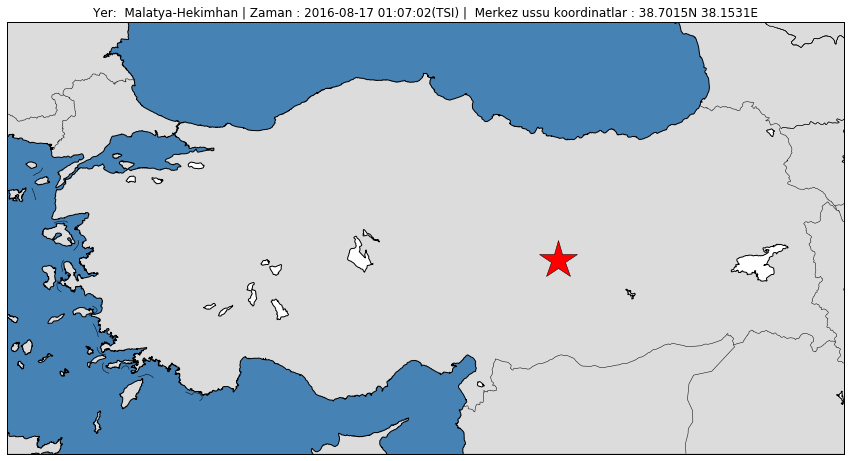

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,15))

themap = Basemap(projection='merc', #gall
              llcrnrlon = 25,              # lower-left corner longitude
              llcrnrlat = 35,               # lower-left corner latitude
              urcrnrlon = 45,               # upper-right corner longitude
              urcrnrlat = 43,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 100.0,
              )
themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

#haritada gösterm
x, y = themap(longitude , latitude)
themap.plot(x, y, 
            '*',                    # marker shape
            color='Red',         # marker colour
            markersize=40            # marker size
            )
plt.title("Yer: "+location+" | Zaman :"+zaman+"(TSI) |  Merkez ussu koordinatlar : "+ str(latitude) +"N " + str(longitude)+"E" )
plt.savefig('Son deprem.png')
plt.show()


---
## **B** - Kayıt yapan istasyonların verilerinin okunması

Son depremin sayfasından kayıt yapan istasyonların bilgilerinin alınması

In [10]:
# Şimdi Son deprem sayfasındaki tüm kayıt yapan istasyonları çıkartalım.
istasyon_kayit_dataframe=[]
for i in last_eqe_satir:
    if i.find("<td class=coltype01><a target=_blank href=") > 0:
        # şimdi url bulalım
        baslangic = i.find(" href=") +7
        bitis = i.find('">')
        istasyon_kayit_url = ("http://kyhdata.deprem.gov.tr/"+ i[baslangic:bitis])
        # şimdi de istasyon kodu bulalım
        baslangic = i.find('">') +2
        bitis = i.find('</a>')
        istasyon_kayit_kod = ( i[baslangic:bitis])
        # bu kısmı çözemedim =======================================================
        istasyon_kayit_dataframe.append ((istasyon_kayit_kod , istasyon_kayit_url))
print'\n'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "| Son Depremde kayıt yapan istasyon sayısı : " + \
str(len(istasyon_kayit_dataframe))




2016-08-22 17:11:23| Son Depremde kayıt yapan istasyon sayısı : 15


### Şimdi tek tek tüm istasyonlardan alınacak verileri inceleyelim. 

In [11]:
# İstasyon verisi okuma fonksiyonu yaratalım. 
istasyon_url = 'http://kyhdata.deprem.gov.tr//2K/genAcc.php?dst=TU9EVUxFX05BTUU9ZXZ0RmlsZSZNT0RVTEVfVEFTSz1zaG93Jk1PRFVMRV9TVUJUQVNLPUFMTCZNT0RVTEVfVEFSR0VUPW9sZCZUQVJHRVQ9MjAxNjA4MDIxOTMwNTJfMTgwNCZUQVJHRVRfU0VSSUFMPTIyMTI5'

#def kyh_verisi_okuma(istasyon_url):
kyh_istasyon_homepage_content = urllib2.urlopen( istasyon_url )
kyh_istasyon_html = kyh_istasyon_homepage_content.read()

baslangic = kyh_istasyon_html.find('a href="') 
bitis = kyh_istasyon_html.find('"><img src=') 
# Indirilecek dosyanin Url'sinin belirlenmesi
data_url = 'http://kyhdata.deprem.gov.tr/' + kyh_istasyon_html[baslangic+8:bitis-1]
# Dosyanin iceriginin okunmasi
kyh_istasyon_data_content = urllib2.urlopen( data_url )
kyh_istasyon_data = kyh_istasyon_data_content.read()

print'\n'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S') + '| Dosya okundu'

eqe_data_satir = ''
eqe_data_satir = kyh_istasyon_data.split('\n')
eqe_x = [0]
eqe_data_satir
counter = 1
for i in eqe_data_satir:
    if counter > 19: #and counter  < 30:
        satir = i.split(' ')
        #print len(satir)
        counter_satir = 1 
        for j in satir:
            if len(j) > 1:
                eqe_x.append(float(j))
    counter = counter + 1
#print eqe_x
time = range(len(eqe_x))



2016-08-22 17:11:32| Dosya okundu


In [12]:
istasyon_kayit_dataframe[0][1]
# for i in istasyon_kayit_dataframe:
#     print i

'http://kyhdata.deprem.gov.tr//2K/genAcc.php?dst=TU9EVUxFX05BTUU9ZXZ0RmlsZSZNT0RVTEVfVEFTSz1zaG93Jk1PRFVMRV9TVUJUQVNLPUFMTCZNT0RVTEVfVEFSR0VUPW9sZCZUQVJHRVQ9MjAxNjA4MTcwMTA3MDJfNDQwNyZUQVJHRVRfU0VSSUFMPTIyMjU4'